In [1]:
#Importing tensorflow & Keras
import keras
import tensorflow

Using TensorFlow backend.
c:\users\vivek\anaconda3\envs\tfod\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\vivek\anaconda3\envs\tfod\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\vivek\anaconda3\envs\tfod\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\vivek\anaconda3\envs\tfod\lib\site-packag

In [2]:
#Printing the tf version
tensorflow.__version__

'1.14.0'

In [3]:
#Importing all other necessary libraries for CNN model creation
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import MaxPooling2D
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization


In [4]:
#Installing  tflearn 
!pip install tflearn

In [5]:
#Get Data oxflower17
import tflearn
import tflearn.datasets.oxflower17 as oxflower17
X, Y = oxflower17.load_data(one_hot=True)


curses is not supported on this machine (please install/reinstall curses for an optimal experience)








In [6]:
#checking image shape
X.shape

(1360, 224, 224, 3)

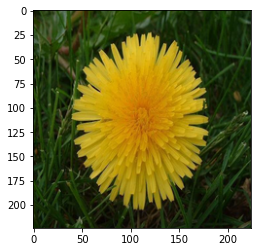

In [7]:
#Plotting 1st image
import matplotlib.pyplot as plt
%matplotlib inline

plt.Figure(figsize=(100,100))
plt.imshow(X[0])

# Building Model Architecture - Alexnet

In [8]:
model = Sequential()

In [9]:
#1st Convolutional layer
model.add(Conv2D(filters=96,kernel_size=(11,11), input_shape = (224,224,3),strides=(4,4), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
model.add(BatchNormalization())

In [10]:
#2nd Convolutional layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides = (1,1), padding='valid'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
model.add(BatchNormalization())

In [11]:
#3rd Convolutional layer
model.add(Conv2D(filters = 384, kernel_size=(3,3), strides=(1,1), padding="valid"))
model.add(Activation("relu"))
model.add(BatchNormalization())

In [12]:
#4th Convolutional layer
model.add(Conv2D(filters=384,kernel_size=(3,3), strides = (1,1), padding="valid"))
model.add(Activation('relu'))
model.add(BatchNormalization())

In [13]:
#5th Covolutional layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides = (1,1), padding = 'valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2),padding='valid'))
model.add(BatchNormalization())

In [14]:
#Flatten the CNN
model.add(Flatten())

In [15]:
#Making the 1st FNN
model.add(Dense(4096, input_shape = (224,224,3)))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())

In [16]:
#2nd FNN
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())

In [17]:
#3rd FNN
model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())

In [18]:
#Output layer
model.add(Dense(17))
model.add(Activation('softmax'))

In [19]:
#Compilation
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
activation_1 (Activation)    (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_2 (Activation)    (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 256)        

In [21]:
model.fit(X, Y, batch_size=64, epochs=5, validation_split=0.2, verbose=1, shuffle=True)


Train on 1088 samples, validate on 272 samples
Epoch 1/5
1088/1088 [==============================] - 107s 98ms/step - loss: 2.8928 - accuracy: 0.2564 - val_loss: 24.5596 - val_accuracy: 0.0625
Epoch 2/5
1088/1088 [==============================] - 106s 98ms/step - loss: 2.2206 - accuracy: 0.3364 - val_loss: 14.7686 - val_accuracy: 0.1250
Epoch 3/5
1088/1088 [==============================] - 106s 98ms/step - loss: 1.7627 - accuracy: 0.4393 - val_loss: 18.2955 - val_accuracy: 0.0699
Epoch 4/5
1088/1088 [==============================] - 108s 99ms/step - loss: 1.5955 - accuracy: 0.4853 - val_loss: 4.0294 - val_accuracy: 0.2574
Epoch 5/5
1088/1088 [==============================] - 106s 97ms/step - loss: 1.6002 - accuracy: 0.5009 - val_loss: 3.5789 - val_accuracy: 0.2574
